In [51]:
from pyspark.sql import SparkSession
import pandas as pd
from pyspark.sql import functions as F
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

spark = (SparkSession.builder.appName("Akshi_capstone1")\
        .config("hive.metastore.uris","thrift://ip-10-1-2-24.ap-south-1.compute.internal:9083")\
        .enableHiveSupport().getOrCreate())

In [52]:
spark

In [53]:
spark.sql("use akshialabs").show()
spark.sql("show tables").show()

++
||
++
++

+----------+-----------------+-----------+
|  database|        tableName|isTemporary|
+----------+-----------------+-----------+
|akshialabs|              clv|      false|
|akshialabs|          default|      false|
|akshialabs|      departments|      false|
|akshialabs|         dept_emp|      false|
|akshialabs|     dept_manager|      false|
|akshialabs|         duration|      false|
|akshialabs|        employees|      false|
|akshialabs|            grace|      false|
|akshialabs|             hvac|      false|
|akshialabs|    hvac_building|      false|
|akshialabs|       hvac_final|      false|
|akshialabs|hvac_temperatures|      false|
|akshialabs|         kweblist|      false|
|akshialabs|            late1|      false|
|akshialabs|            late2|      false|
|akshialabs|           latlon|      false|
|akshialabs|  left_emp_tenure|      false|
|akshialabs|         loandata|      false|
|akshialabs|   migrate_status|      false|
|akshialabs|               nt|      false

## Exploratory Data Analysis

### 1. A list showing employee number, last name, first name, sex, and salary for each employee

In [54]:
spark.sql("select e.emp_no, e.last_name, e.first_name, e.sex, s.salary\
    from akshialabs.employees e inner join akshialabs.salaries s\
    on e.emp_no = s.emp_no").show()

+------+----------+----------+---+------+
|emp_no| last_name|first_name|sex|salary|
+------+----------+----------+---+------+
|473302|  Zallocco|  Hideyuki|  M| 40000|
|475053| Delgrande|     Byong|  F| 53422|
| 57444|      Babb|     Berry|  F| 48973|
|421786|  Verhoeff|     Xiong|  M| 40000|
|282238|   Baumann|Abdelkader|  F| 40000|
|263976|  Cusworth|      Eran|  M| 40000|
|273487|   Parfitt| Christoph|  M| 56087|
|461591|  Samarati|    Xudong|  M| 40000|
|477657| Magliocco|    Lihong|  M| 54816|
|219881|     Speek| Kwangyoen|  F| 40000|
| 29920|     Tyugu|   Shuichi|  F| 40000|
|208153|      Lunn|   Abdulah|  M| 50183|
| 13616|     Lorho|     Perry|  F| 40000|
|246449|Bultermann|     Subbu|  F| 87084|
| 21529|  Zallocco|     Bojan|  M| 40000|
| 17934|  Wuwongse|  Bilhanan|  M| 48795|
| 48085|      Gilg|Venkatesan|  M| 63016|
|239838|     Dulli|   Naftali|  M| 57715|
|240129|    Karnin|     Roddy|  M| 43548|
|205246|    Demizu|     Nevio|  F| 80252|
+------+----------+----------+---+

### 2. A list showing first name, last name, and hire date for employees who were hired in 1986.

In [55]:
spark.sql("select first_name,last_name,hire_date from employees where  substr(hire_date,6,10) = '1986'").show()

+----------+-----------+---------+
|first_name|  last_name|hire_date|
+----------+-----------+---------+
|     Nevio|     Demizu|5/18/1986|
|     Mohit|      Speek|1/14/1986|
|  Qunsheng|      Speer|2/13/1986|
|  Harngdar|      Swick|5/28/1986|
|     Bowen|   Schmezko|5/30/1986|
|    Reuven|      Munke|4/13/1986|
| Juichirou|   Jumpertz|9/18/1986|
|   Xiadong|       Bach|4/29/1986|
| Guangming|Butterworth|10/1/1986|
|     Irene|      Setia|8/10/1986|
|   Terresa|      Perez|9/12/1986|
|    Lidong|    Borovoy|5/30/1986|
| Stabislas|   McFarlin|7/19/1986|
|      Khun|     Kuszyk|6/30/1986|
|     Conor|   Flanders|2/21/1986|
|    Shigeu|      Denna|4/10/1986|
|       Uta|    Frolund|1/22/1986|
|      Sven|     Krider|9/25/1986|
|    Yannik|     Vakili|11/9/1986|
|   Khatoun| Zeilberger|1/31/1986|
+----------+-----------+---------+
only showing top 20 rows



### 3. A list showing the manager of each department with the following information: department number, department name,the manager's employee number, last name, first name.

In [56]:
spark.sql("select t1.dept_no,t2.emp_no,t3.last_name,t3.first_name from departments t1 inner join dept_manager t2 on t1.dept_no = t2.dept_no inner join employees t3 on t2.emp_no = t3.emp_no").show()

+-------+------+------------+-----------+
|dept_no|emp_no|   last_name| first_name|
+-------+------+------------+-----------+
|   d009|111877|    Spinelli|    Xiaobin|
|   d008|111534|      Kambil|     Hilary|
|   d006|110765|     Hofmeyr|     Rutger|
|   d004|110420|    Ghazalie|      Oscar|
|   d006|110725|     Onuegbe|  Peternela|
|   d001|110022|  Markovitch|  Margareta|
|   d007|111035|   Kaelbling|Przemyslawa|
|   d005|110511|    Hagimont|   DeForest|
|   d005|110567|    DasSarma|       Leon|
|   d003|110183|Ossenbruggen|    Shirish|
|   d009|111939|     Weedman|    Yuchang|
|   d002|110114|  Legleitner|      Isamu|
|   d006|110854|       Pesch|       Dung|
|   d001|110039|    Minakawa|   Vishwani|
|   d006|110800|     Quadeer|     Sanjoy|
|   d003|110228|     Sigstam|    Karsten|
|   d004|110303|     Wegerle|  Krassimir|
|   d004|110344|       Cools|     Rosine|
|   d009|111692| Butterworth|      Tonny|
|   d008|111400|     Staelin|       Arie|
+-------+------+------------+-----

### 4. A list showing the department of each employee with the following information: employee number, last name, first name, and department name.

In [57]:
spark.sql(" select t2.emp_no, t3.last_name,t3.first_name,t1.dept_name from departments t1 inner join dept_emp t2 on t1.dept_no = t2.dept_no inner join employees t3 on t2.emp_no = t3.emp_no").show()

+------+-----------+----------+--------------------+
|emp_no|  last_name|first_name|           dept_name|
+------+-----------+----------+--------------------+
| 10001|    Facello|    Georgi|       "development"|
| 10002|     Simmel|   Bezalel|             "Sales"|
| 10003|    Bamford|     Parto|        "Production"|
| 10004|    Koblick| Chirstian|        "Production"|
| 10005|   Maliniak|   Kyoichi|   "Human Resources"|
| 10006|    Preusig|    Anneke|       "development"|
| 10007|  Zielinski|   Tzvetan|          "Research"|
| 10008|   Kalloufi|    Saniya|       "development"|
| 10009|       Peac|    Sumant|"Quality Management"|
| 10010|   Piveteau| Duangkaew|        "Production"|
| 10010|   Piveteau| Duangkaew|"Quality Management"|
| 10011|      Sluis|      Mary|  "Customer Service"|
| 10012|  Bridgland|  Patricio|       "development"|
| 10013|     Terkki| Eberhardt|   "Human Resources"|
| 10014|      Genin|     Berni|       "development"|
| 10015|  Nooteboom|  Guoxiang|          "Rese

### 5. A list showing first name, last name, and sex for employees whose first name is "Hercules" and last names begin with "B.“

In [58]:
spark.sql(" select first_name,last_name ,sex from employees where first_name = 'Hercules' and last_name like('B%')").show()

+----------+-------------+---+
|first_name|    last_name|sex|
+----------+-------------+---+
|  Hercules|         Baer|  M|
|  Hercules|        Biron|  F|
|  Hercules|        Birge|  F|
|  Hercules|      Berstel|  F|
|  Hercules|    Bernatsky|  M|
|  Hercules|         Bail|  F|
|  Hercules|       Bodoff|  M|
|  Hercules|     Benantar|  F|
|  Hercules|      Basagni|  M|
|  Hercules|Bernardinello|  F|
|  Hercules|   Baranowski|  M|
|  Hercules|      Bisiani|  F|
|  Hercules|   Benzmuller|  M|
|  Hercules|         Bahr|  M|
|  Hercules|        Biran|  F|
|  Hercules|         Bain|  F|
|  Hercules|      Brendel|  F|
|  Hercules|      Buchter|  M|
|  Hercules|     Barreiro|  M|
|  Hercules|         Baak|  M|
+----------+-------------+---+



### 6. A list showing all employees in the Sales department, including their employee number, last name, first name, and department name.
 

In [59]:
spark.sql(" select t1.emp_no,t1.last_name,t1.first_name,t3.dept_name from employees t1  join dept_emp t2 on t1.emp_no = t2.emp_no  join departments t3 on t2.dept_no = t3.dept_no  where t3.dept_name = '\"Sales\"'").show()

+------+-------------+----------+---------+
|emp_no|    last_name|first_name|dept_name|
+------+-------------+----------+---------+
|246449|   Bultermann|     Subbu|  "Sales"|
|205246|       Demizu|     Nevio|  "Sales"|
|476443|       Asmuth|      Ziya|  "Sales"|
|424270|    Yoshizawa|    Kellyn|  "Sales"|
|280408|         Perl|   Elliott|  "Sales"|
|289261|     Nollmann|       Gad|  "Sales"|
|444985|     Verspoor|      Giap|  "Sales"|
|477628|Beutelspacher|      Duro|  "Sales"|
| 42625|        Swick|  Harngdar|  "Sales"|
| 85093|       Covnot| Nectarios|  "Sales"|
|205366|    Shimshoni|  Kazuhira|  "Sales"|
| 37601|    Naumovich|   Gilbert|  "Sales"|
|437985|        Munke|    Reuven|  "Sales"|
| 28823|     Skafidas|     Tonny|  "Sales"|
|107258|       Zaumen|    Parviz|  "Sales"|
| 11980|         Pews| Yechezkel|  "Sales"|
|457800|      Domenig| Stabislas|  "Sales"|
|414537|     Businaro|   Chikara|  "Sales"|
|414885|       Vecchi|   Candido|  "Sales"|
|217945|        Georg|    Shmuel

### 7. A list showing all employees in the Sales and Development departments, including their employee number, last name, first name, and department name.

In [60]:
spark.sql(" select t1.emp_no,t1.last_name,t1.first_name,t3.dept_name from employees t1  join dept_emp t2 on t1.emp_no = t2.emp_no  join departments t3 on t2.dept_no = t3.dept_no  where t3.dept_name IN('\"Sales\"','\"Development\"') ").show()

+------+-------------+----------+---------+
|emp_no|    last_name|first_name|dept_name|
+------+-------------+----------+---------+
|246449|   Bultermann|     Subbu|  "Sales"|
|205246|       Demizu|     Nevio|  "Sales"|
|476443|       Asmuth|      Ziya|  "Sales"|
|424270|    Yoshizawa|    Kellyn|  "Sales"|
|280408|         Perl|   Elliott|  "Sales"|
|289261|     Nollmann|       Gad|  "Sales"|
|444985|     Verspoor|      Giap|  "Sales"|
|477628|Beutelspacher|      Duro|  "Sales"|
| 42625|        Swick|  Harngdar|  "Sales"|
| 85093|       Covnot| Nectarios|  "Sales"|
|205366|    Shimshoni|  Kazuhira|  "Sales"|
| 37601|    Naumovich|   Gilbert|  "Sales"|
|437985|        Munke|    Reuven|  "Sales"|
| 28823|     Skafidas|     Tonny|  "Sales"|
|107258|       Zaumen|    Parviz|  "Sales"|
| 11980|         Pews| Yechezkel|  "Sales"|
|457800|      Domenig| Stabislas|  "Sales"|
|414537|     Businaro|   Chikara|  "Sales"|
|414885|       Vecchi|   Candido|  "Sales"|
|217945|        Georg|    Shmuel

### 8. A list showing the frequency count of employee last names, in descending order. ( i.e., how many employees share each last name

In [61]:
spark.sql("  select last_name , count(emp_no) from employees   group by last_name").show()

+----------------+-------------+
|       last_name|count(emp_no)|
+----------------+-------------+
|       Delgrossi|          188|
|         Rullman|          171|
|        Hagimont|          164|
|         Lanteri|          173|
|          Nanard|          194|
|          Saoudi|          176|
|   Beutelspacher|          180|
|          Butner|          193|
|          Stille|          165|
|          Aamodt|          205|
|Sankaranarayanan|          183|
|         Kleiser|          193|
|       Besselaar|          188|
|         Solovay|          178|
|          Ritcey|          156|
|      Hinsberger|          187|
|            Lund|          170|
|     Shokrollahi|          179|
|      Taubenfeld|          200|
|            Gips|          167|
+----------------+-------------+
only showing top 20 rows



### 9. Histogram to show the salary distribution among the employees

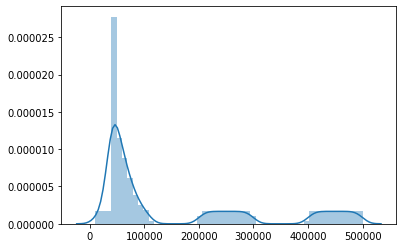

In [62]:
sns.distplot(spark.sql("select emp_no , sum(salary) from salaries group by emp_no ").toPandas(), norm_hist= True)
plt.show()

### 10. Bar graph to show the Average salary per title (designation)

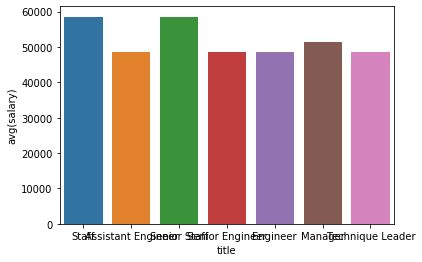

In [63]:
sns.barplot(x='title' , y='avg(salary)', data = spark.sql("select t.title, avg(s.salary) from employees e inner join titles t on e.emp_title_id = t.title_id inner join salaries s on e.emp_no = s.emp_no group by t.title").toPandas() )
plt.show()

### 11. Calculate employee tenure & show the tenure distribution among the employees


In [65]:
spark.sql("SELECT COUNT(emp_no), CASE WHEN last_year IS NULL THEN (2013-hire_year)  ELSE (last_year - hire_year)   END AS tenure FROM  tenure GROUP BY CASE  WHEN last_year IS NULL THEN (2013-hire_year) ELSE (last_year - hire_year) END").show()

+-------------+------+
|count(emp_no)|tenure|
+-------------+------+
|        31832|    28|
|        30175|    26|
|        32530|    27|
|         2441|    12|
|        20294|    22|
|          500|     1|
|         2275|    13|
|         2414|     6|
|         6033|    16|
|         2488|     3|
|        15953|    20|
|         2430|     5|
|        13339|    19|
|         3746|    15|
|         2438|     9|
|         8632|    17|
|         2491|     4|
|         2446|     8|
|        23138|    23|
|         2392|     7|
+-------------+------+
only showing top 20 rows



### 12. Count of employee gender distribution.

In [68]:
spark.sql(" SELECT sex , COUNT(emp_no) FROM employees GROUP BY sex").show()

+---+-------------+
|sex|count(emp_no)|
+---+-------------+
|  F|       120051|
|  M|       179973|
+---+-------------+



### 13. Count of employees basewd on rating.

In [71]:
spark.sql("SELECT Last_performance_rating , COUNT(emp_no) FROM employees  Group BY last_performance_rating").show()

+-----------------------+-------------+
|Last_performance_rating|count(emp_no)|
+-----------------------+-------------+
|                      B|       107154|
|                      C|        71304|
|                      A|        95919|
|                      S|        10542|
|                    PIP|        15105|
+-----------------------+-------------+



### 14. which department required maximun empoyment performance improvement.

In [76]:
spark.sql("select t3.dept_name , count(t1.emp_no) from employees t1 left join dept_emp t2 on t1.emp_no= t2.emp_no left join departments t3 on t2.dept_no = t3.dept_no  where t1.last_performance_rating = 'PIP' group by t3.dept_name order by count(t1.emp_no) desc").show()

+--------------------+-------------+
|           dept_name|count(emp_no)|
+--------------------+-------------+
|       "development"|         4373|
|        "Production"|         3690|
|             "Sales"|         2605|
|  "Customer Service"|         1150|
|          "Research"|         1064|
|         "Marketing"|          999|
|"Quality Management"|          992|
|           "Finance"|          914|
|   "Human Resources"|          874|
+--------------------+-------------+



### 15. count of employees according to desingnation. 

In [77]:
spark.sql("SELECT T.title,COUNT(EMP.emp_no)  FROM titles T  INNER JOIN employees EMP ON T.title_id = EMP.emp_title_id GROUP BY(T.title)").show()

+------------------+-------------+
|             title|count(emp_no)|
+------------------+-------------+
|             Staff|       107384|
|Assistant Engineer|         5835|
|      Senior Staff|        26583|
|   Senior Engineer|        97747|
|          Engineer|        47303|
|           Manager|           24|
|  Technique Leader|        15148|
+------------------+-------------+



### 16. department wise performance 

In [81]:
spark.sql("select t3.dept_name ,t1.last_performance_rating, count(t1.emp_no) from employees t1 left join dept_emp t2 on t1.emp_no= t2.emp_no left join departments t3 on t2.dept_no = t3.dept_no group by t3.dept_name,t1.last_performance_rating order by count(t1.emp_no) desc").show()

+--------------------+-----------------------+-------------+
|           dept_name|last_performance_rating|count(emp_no)|
+--------------------+-----------------------+-------------+
|       "development"|                      B|        30609|
|       "development"|                      A|        27233|
|        "Production"|                      B|        26233|
|        "Production"|                      A|        23531|
|       "development"|                      C|        20372|
|             "Sales"|                      B|        18764|
|        "Production"|                      C|        17477|
|             "Sales"|                      A|        16641|
|             "Sales"|                      C|        12427|
|  "Customer Service"|                      B|         8462|
|  "Customer Service"|                      A|         7478|
|          "Research"|                      B|         7438|
|"Quality Management"|                      B|         7244|
|         "Marketing"|  

### 17. most paid employees.

In [82]:
spark.sql("select t1.first_name,t1.last_name,sum(t2.salary) from employees t1 left join salaries t2 on t1.emp_no = t2.emp_no group by t1.first_name,t1.last_name order by sum(t2.salary) desc").show()


+------------+-------------+-----------+
|  first_name|    last_name|sum(salary)|
+------------+-------------+-----------+
|    Mohammad|       Ullian|     267002|
|      Bartek|      Garnier|     259201|
|     Rosalyn|       Baalen|     257234|
|    Radoslaw|         Pfau|     254066|
|         Gad|        Krone|     251992|
|      Divine|      Ebeling|     248562|
|        Iara|      Breugel|     246766|
|        Eben|    Francisci|     243202|
|    Yonghong|      Codenie|     241874|
|     Zongyan|      DiGiano|     241645|
|   Laurentiu|     Cesareni|     239415|
| Constantijn|     Pramanik|     236752|
|    Yuichiro|      Brendel|     235377|
|    Branimir|     Griswold|     235302|
|    Jasminko|        Junot|     234801|
|      Jaques|       Zaiane|     233109|
|Sivanarayana|Chandrasekhar|     230977|
|    Jasminko|   Goldhammer|     230706|
|     Martijn|   Besancenot|     230697|
|        Marc|       Stille|     228853|
+------------+-------------+-----------+
only showing top